In [14]:
import geopandas

In [2]:
import matplotlib.pyplot as plt

In [3]:
from cartopy import crs as ccrs

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path(\
                                        'naturalearth_lowres'))

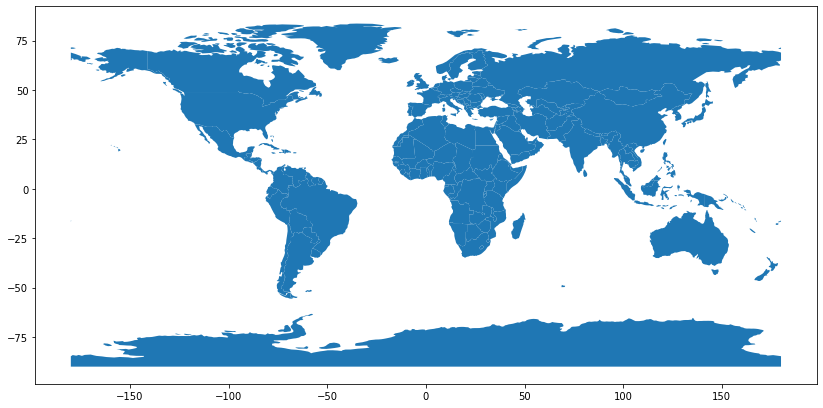

In [5]:
fig, ax = plt.subplots(figsize=(14,8))
world.plot(ax=ax)
pass

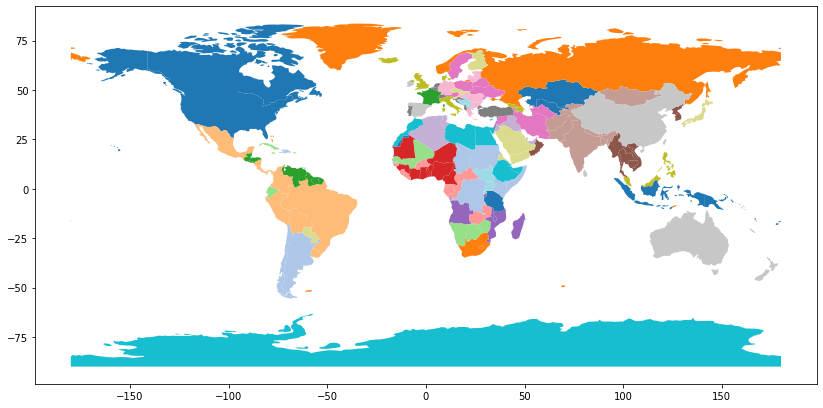

In [6]:
fig, ax = plt.subplots(figsize=(14,8))
world.plot(ax=ax,cmap="tab20")
pass

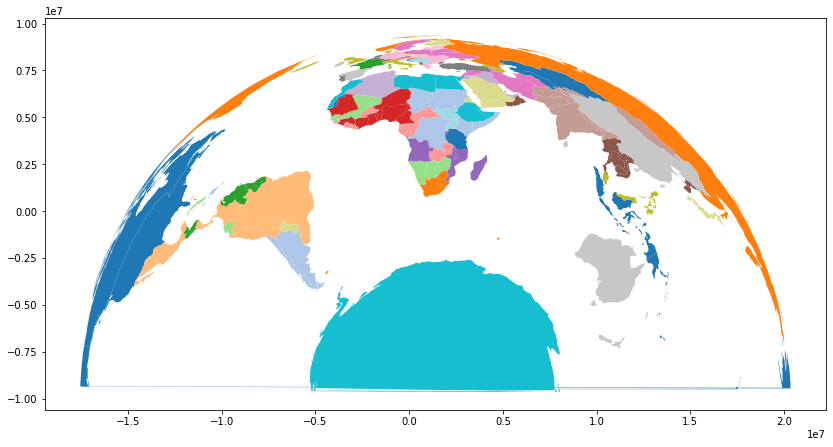

In [7]:
fig, ax = plt.subplots(figsize=(14,14))
world2 = world.to_crs(crs="epsg:9221")
world2.plot(ax=ax,cmap="tab20")
pass

<AxesSubplot:>

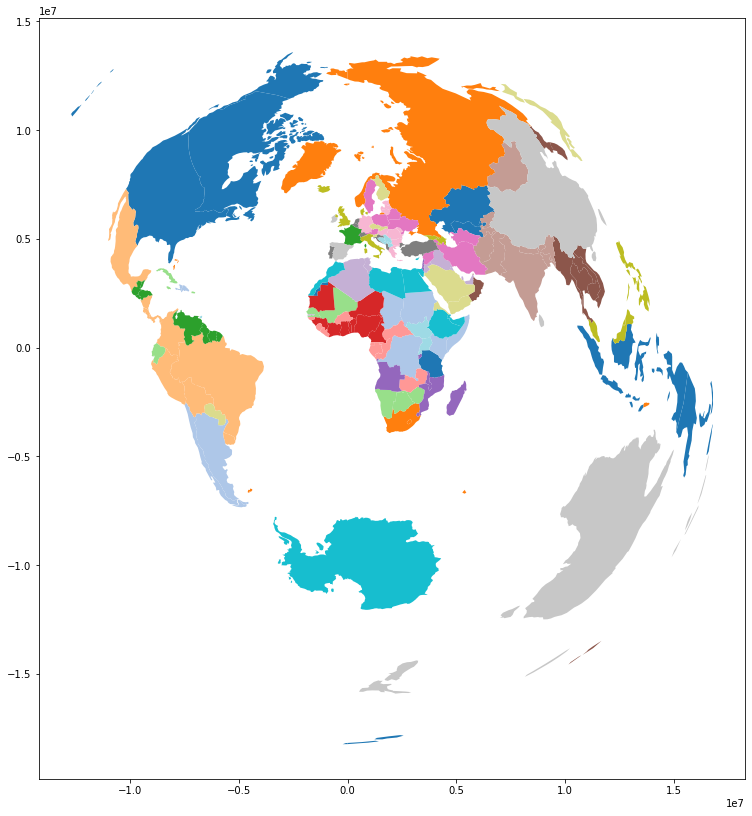

In [8]:
fig, ax = plt.subplots(figsize=(14,14))
crs = ccrs.AzimuthalEquidistant()
crs_proj4 = crs.proj4_init
world2 = world.to_crs(crs_proj4)
world2.plot(ax=ax,cmap="tab20")

In [9]:
def getColor(colName, collist):
    cm = plt.cm.get_cmap(colName)
    col = [cm(float(i)/len(collist)) for i in range(len(collist))]
    cols = {}
    for c in range(len(col)):
        f = "#"+"".join(["{0}".format(hex(int(c1*255)))[2:].zfill(2) for c1 in col[c]])
        cols[collist[c]] = f
    return cols

In [10]:
color = getColor("tab20",world["name"])

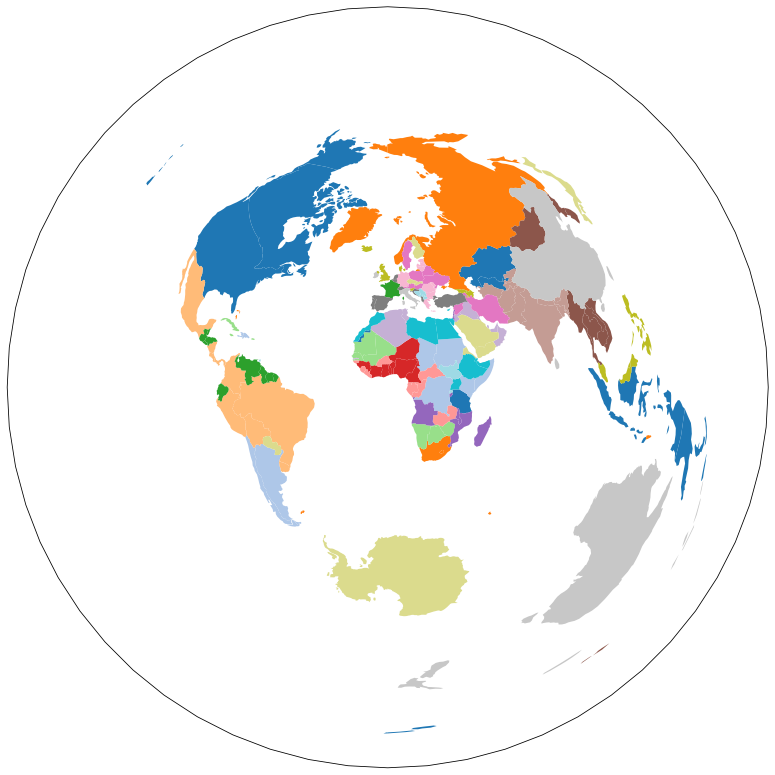

In [11]:
fig, ax = plt.subplots(figsize=(14,14),
                       subplot_kw={'projection': crs})
for idx,n in world2.iterrows():
    ax.add_geometries([n['geometry']], crs=crs,
                  facecolor=color[n["name"]])

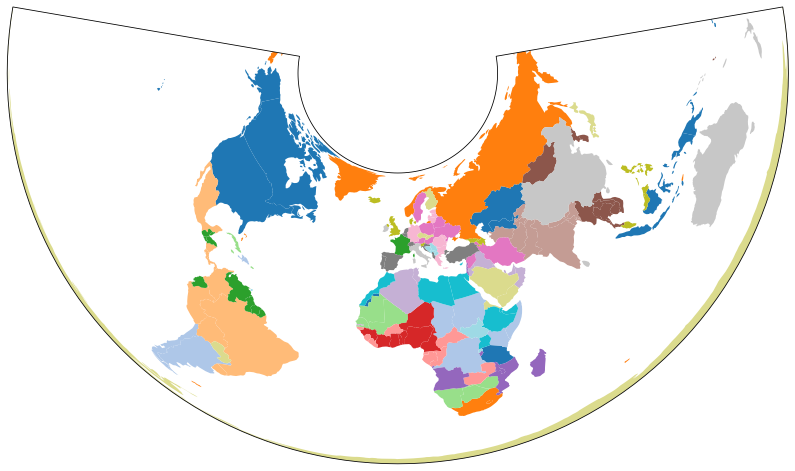

In [12]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in world2['geometry'].values]

fig, ax = plt.subplots(figsize=(14,14),
                       subplot_kw={'projection': crs_new})

for n in range(len(new_geometries)):
    ax.add_geometries([new_geometries[n]], crs=crs_new,
                  facecolor=color[world.iloc[n]["name"]])

<AxesSubplot:>

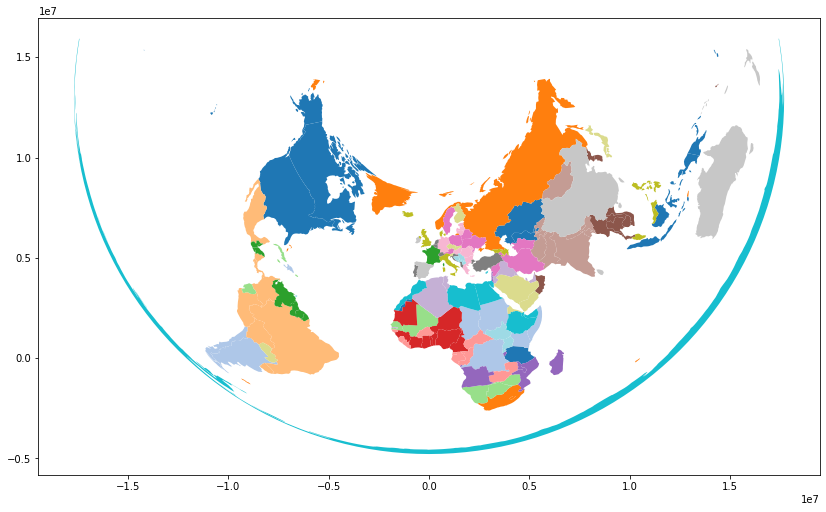

In [13]:
fig, ax = plt.subplots(figsize=(14,14))
df_aea = geopandas.GeoDataFrame(world['name'], geometry=new_geometries,
                                crs=crs_new.proj4_init)
df_aea.plot(ax=ax, cmap="tab20")